In [19]:
import numpy as np

In [20]:
class PCA:
    def __init__(self, n_components=4):
        self.n_components = n_components
        self.mean = None
        self.components_ = None
        
    def fit(self, X):
        self.mean = X - np.mean(X, axis=0)
        covariance = np.cov(X.T)
        eigvals, eigvecs = np.linalg.eigh(covariance)
        idx = np.argsort(eigvals)[-self.n_components::][::-1]
        self.components_ = eigvecs[:, idx]

    def transform(self, X):        
        X = X - self.mean
        print(X.shape)
        print(self.components_.shape)
        return X @ self.components_

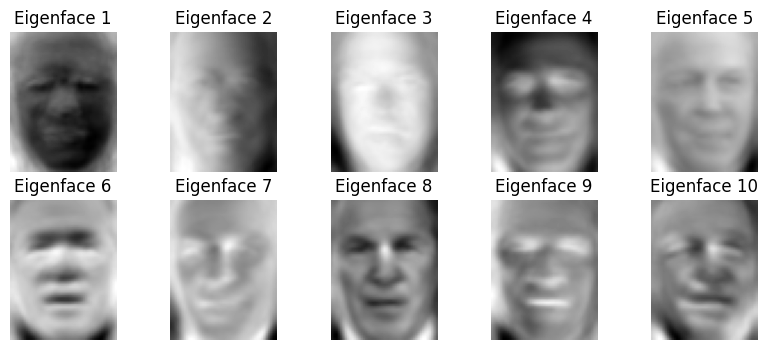

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
# from sklearn.decomposition import PCA

# load the LFW dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=70)
X = lfw_dataset.data

# perform PCA on the dataset
pca = PCA(n_components=10)
pca.fit(X)

# plot the first 10 eigenfaces
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[:, i].reshape((62, 47)), cmap='gray')
    ax.set_title('Eigenface {}'.format(i+1))
    ax.axis('off')
plt.show()

In [23]:
pca.transform(X)

(1288, 2914)
(2914, 10)


array([[-7010.64373518,   563.27204562,  -589.77379335, ...,
          112.77993506,  -300.72968127,   132.11425907],
       [-7010.64373517,   563.27204425,  -589.77379364, ...,
          112.77993457,  -300.72968366,   132.11425716],
       [-7010.6437354 ,   563.27204512,  -589.77379347, ...,
          112.77993475,  -300.72968252,   132.11425838],
       ...,
       [-7010.64373505,   563.27204624,  -589.77379235, ...,
          112.77993501,  -300.7296821 ,   132.11425997],
       [-7010.64373505,   563.27204395,  -589.77379262, ...,
          112.77993441,  -300.72968258,   132.1142578 ],
       [-7010.64373564,   563.27204574,  -589.77379391, ...,
          112.77993519,  -300.729682  ,   132.11425757]])